### In this notebook I want to explain how to work the binary classifier. First I want to show the Perceptron diagram. 


In [22]:
from audioop import error
from random import random

# import libraries.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2 as cv
from PyQt5.QtWidgets.QWidget import update
from pandas.core.common import random_state

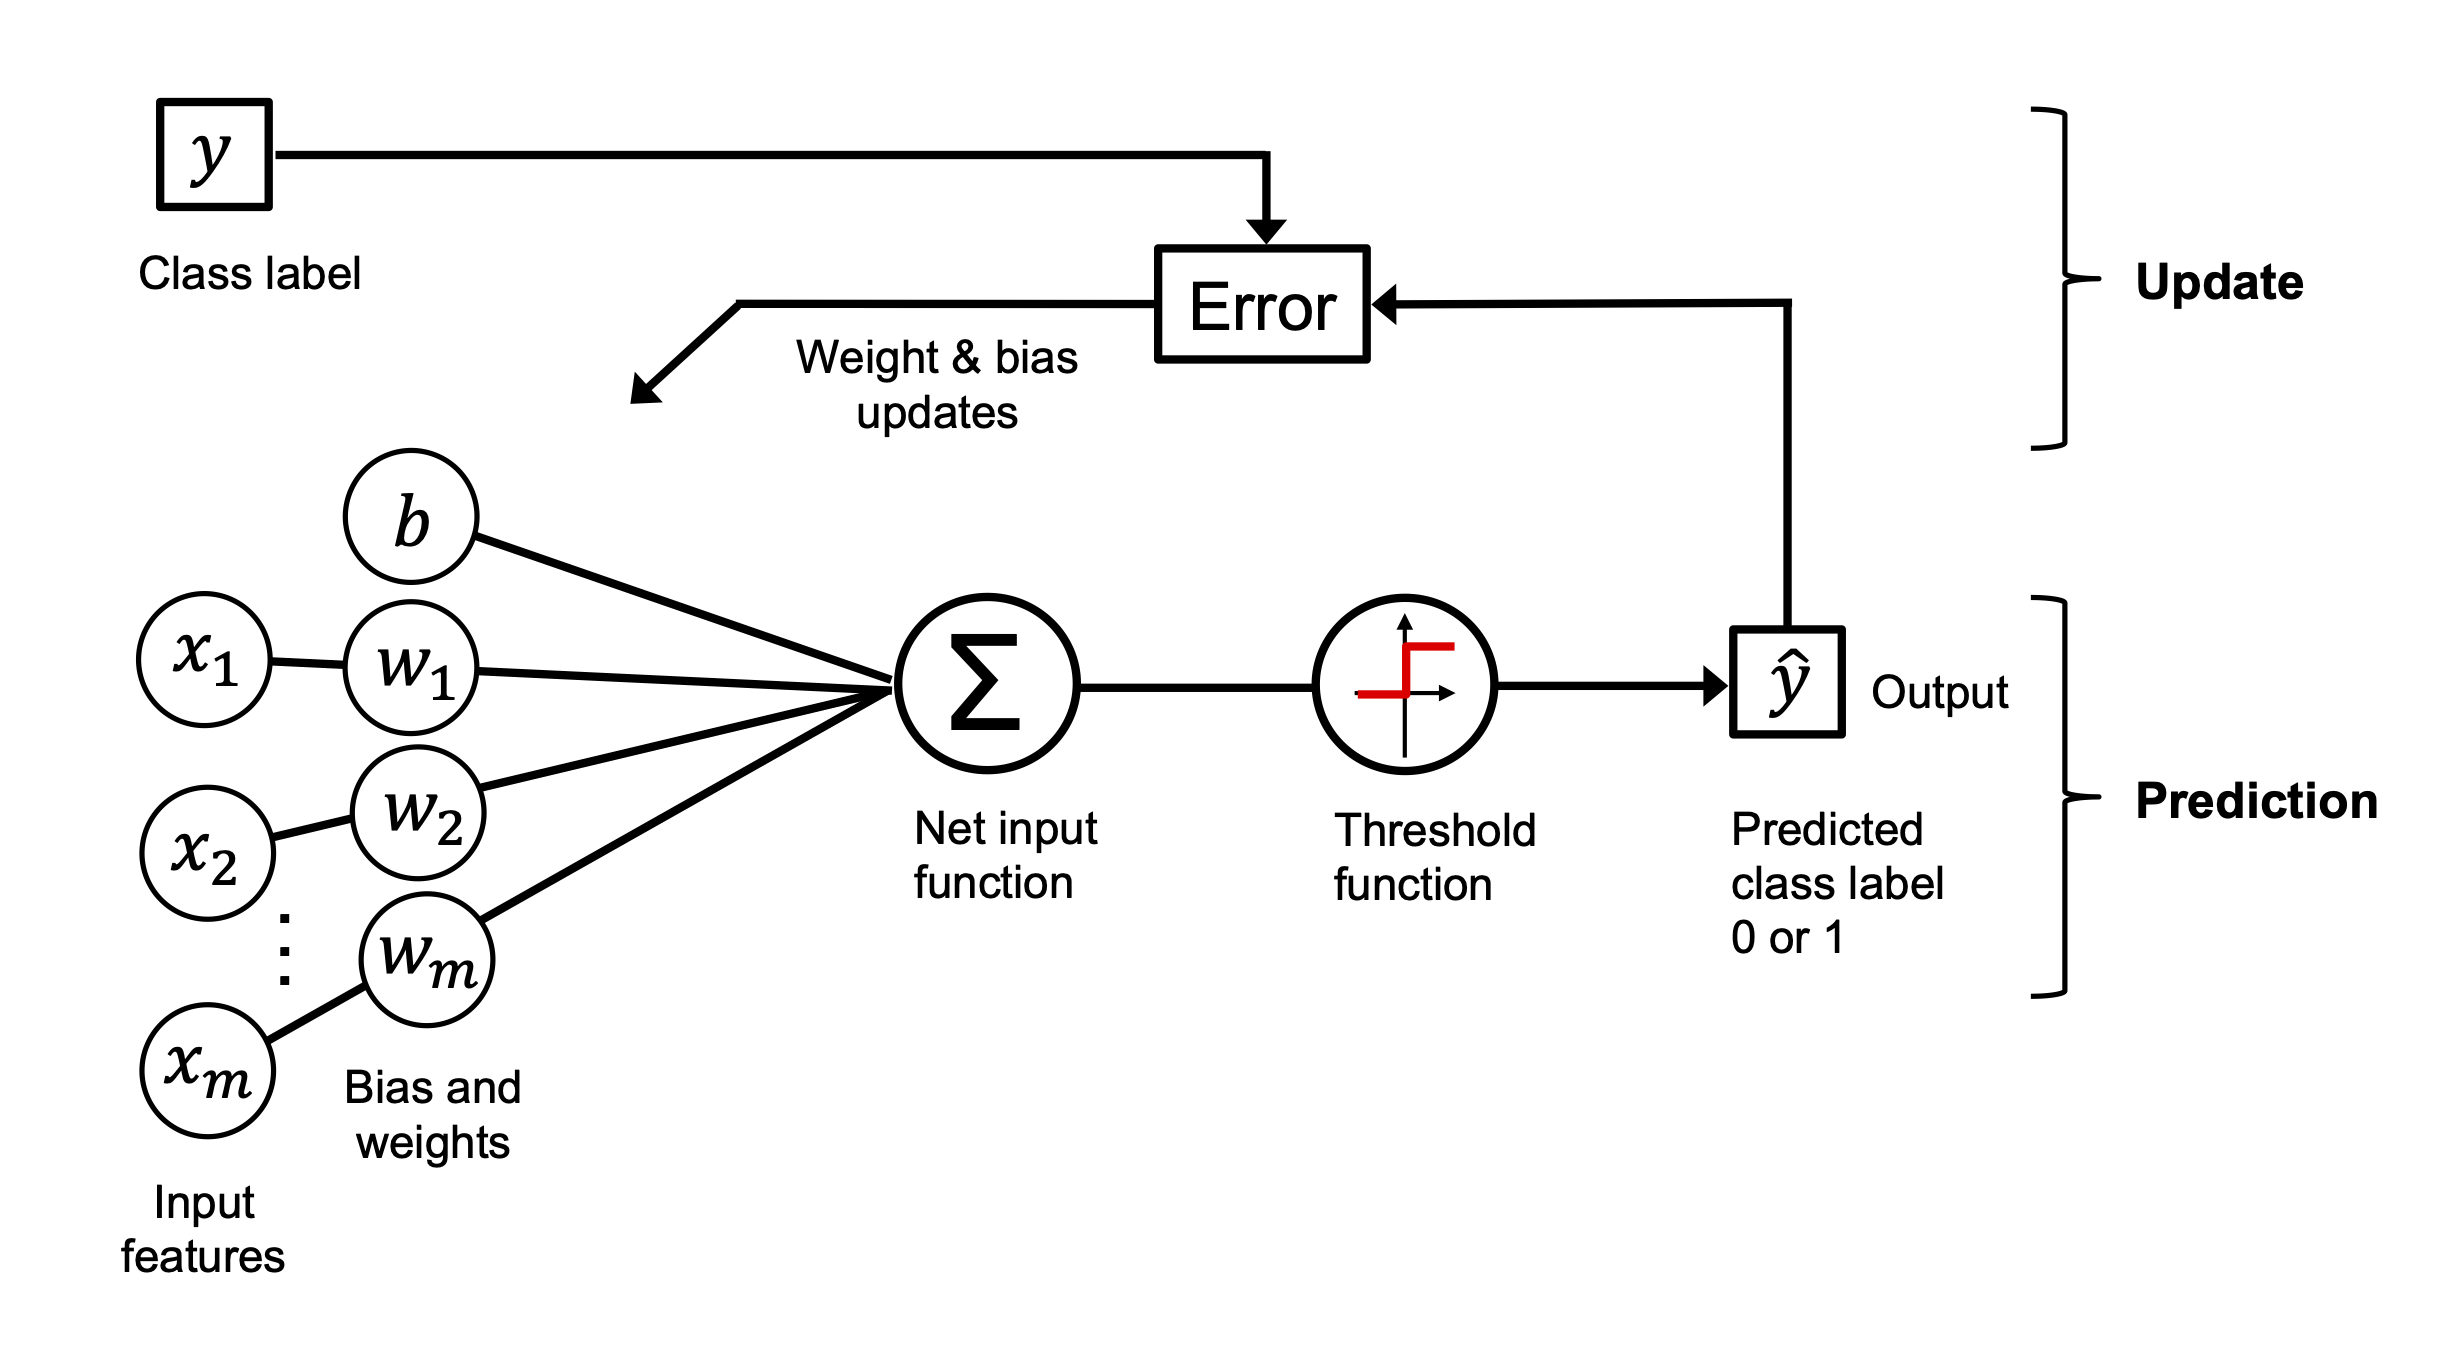

In [25]:
from IPython.display import Image
Image(filename="02_04.png", width=600)

In [26]:
class Perceptron:
    def __init__(self, eta = 0.01, n_inter =50, random_state = 1):
        self.eta = eta
        self.random_state = random_state
        self.n_inter = n_inter
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        
        for _ in range(self.n_inter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        
        
        
    

In [59]:
try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    df = pd.read_csv(s,header=None,encoding='utf-8')
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,header=None,encoding='utf-8')
    
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    df = pd.read_csv(s,header=None,encoding='utf-8')
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,header=None,encoding='utf-8')
    
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


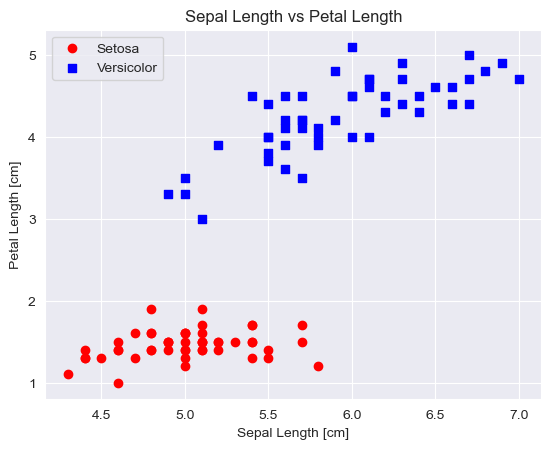

In [68]:
#select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
#extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values
# plot
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker='o', label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker='s', label="Versicolor")
plt.xlabel("Sepal Length [cm]")
plt.ylabel("Petal Length [cm]")
plt.title("Sepal Length vs Petal Length")
plt.legend(loc="upper left")
plt.show()

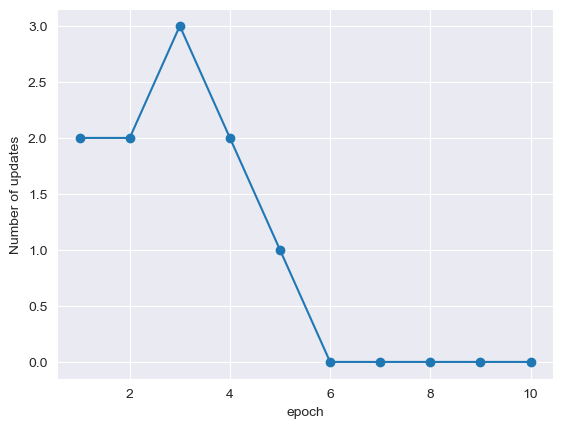

In [71]:
ppn = Perceptron(eta = 0.50, n_inter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel("epoch")
plt.ylabel("Number of updates")
plt.show()

In [72]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

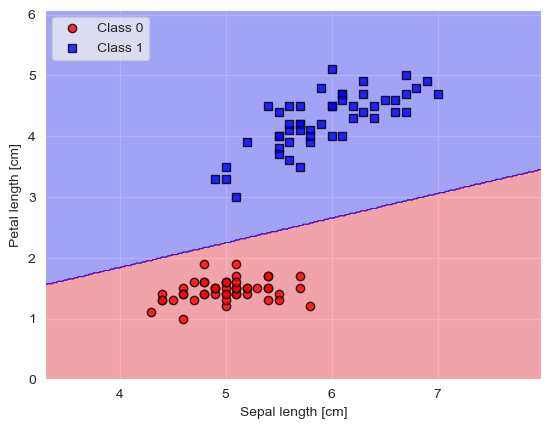

In [73]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

In [138]:
df = pd.read_csv("breast-cancer.csv")
df.head()
df.tail()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [140]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

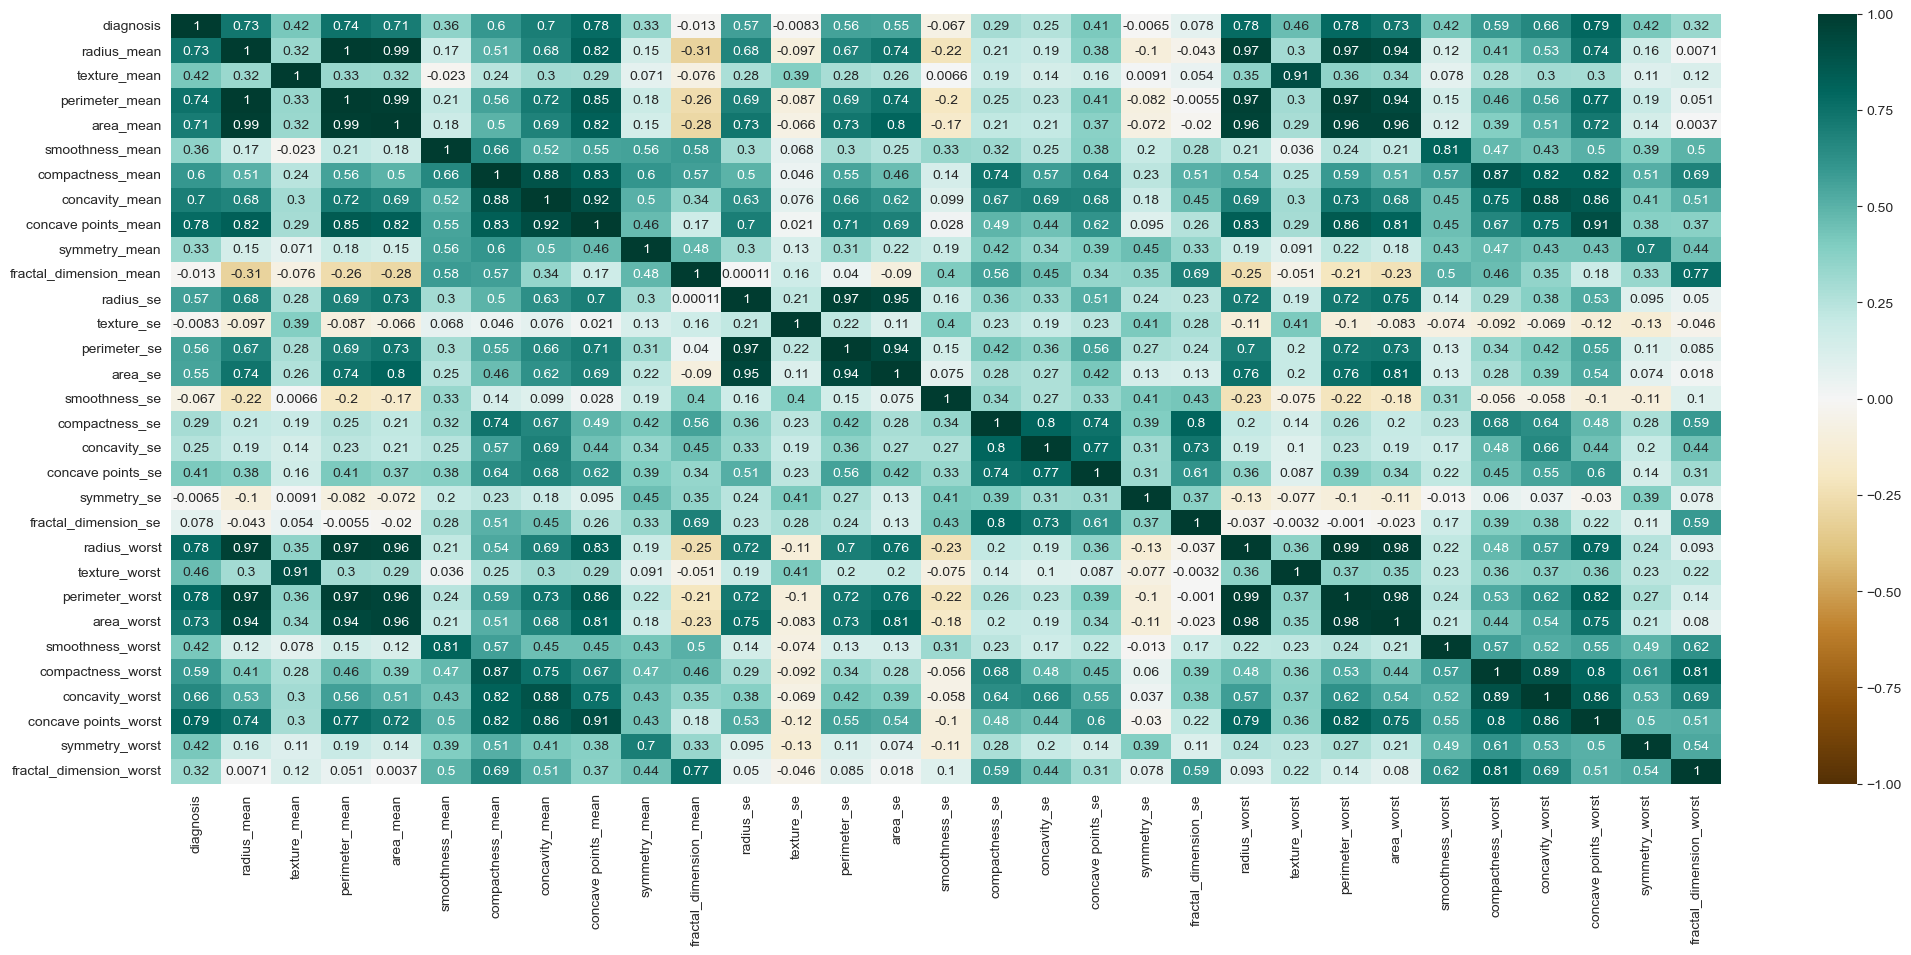

In [173]:
#reasign the M--> 1, B--> 0
df.replace({"diagnosis": {"M":1, "B":0}}, inplace=True)
df = df.sort_values(['diagnosis'], ascending=True)
plt.figure(figsize=(25, 10))
corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

In [180]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
55,0,11.52,18.75,73.34,409.0,0.09524,0.05473,0.03036,0.022780,0.1920,...,12.84,22.47,81.81,506.2,0.12490,0.08720,0.09076,0.06316,0.3306,0.07036
145,0,11.90,14.65,78.11,432.8,0.11520,0.12960,0.03710,0.030030,0.1995,...,13.15,16.51,86.26,509.6,0.14240,0.25170,0.09420,0.06042,0.2727,0.10360
133,0,15.71,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.059330,0.1816,...,17.50,19.25,114.30,922.8,0.12230,0.19490,0.17090,0.13740,0.2723,0.07071
546,0,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,...,11.25,21.77,71.12,384.9,0.12850,0.08842,0.04384,0.02381,0.2681,0.07399
477,0,13.90,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.013390,0.1813,...,15.14,21.80,101.20,718.9,0.09384,0.20060,0.13840,0.06222,0.2679,0.07698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,1,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.033340,0.1616,...,18.10,31.69,117.70,1030.0,0.13890,0.20570,0.27120,0.15300,0.2675,0.07873
562,1,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.094290,0.2128,...,17.52,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090
460,1,17.08,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.064310,0.1793,...,22.96,34.49,152.10,1648.0,0.16000,0.24440,0.26390,0.15550,0.3010,0.09060
230,1,17.05,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.109000,0.2131,...,19.59,24.89,133.50,1189.0,0.17030,0.39340,0.50180,0.25430,0.3109,0.09061


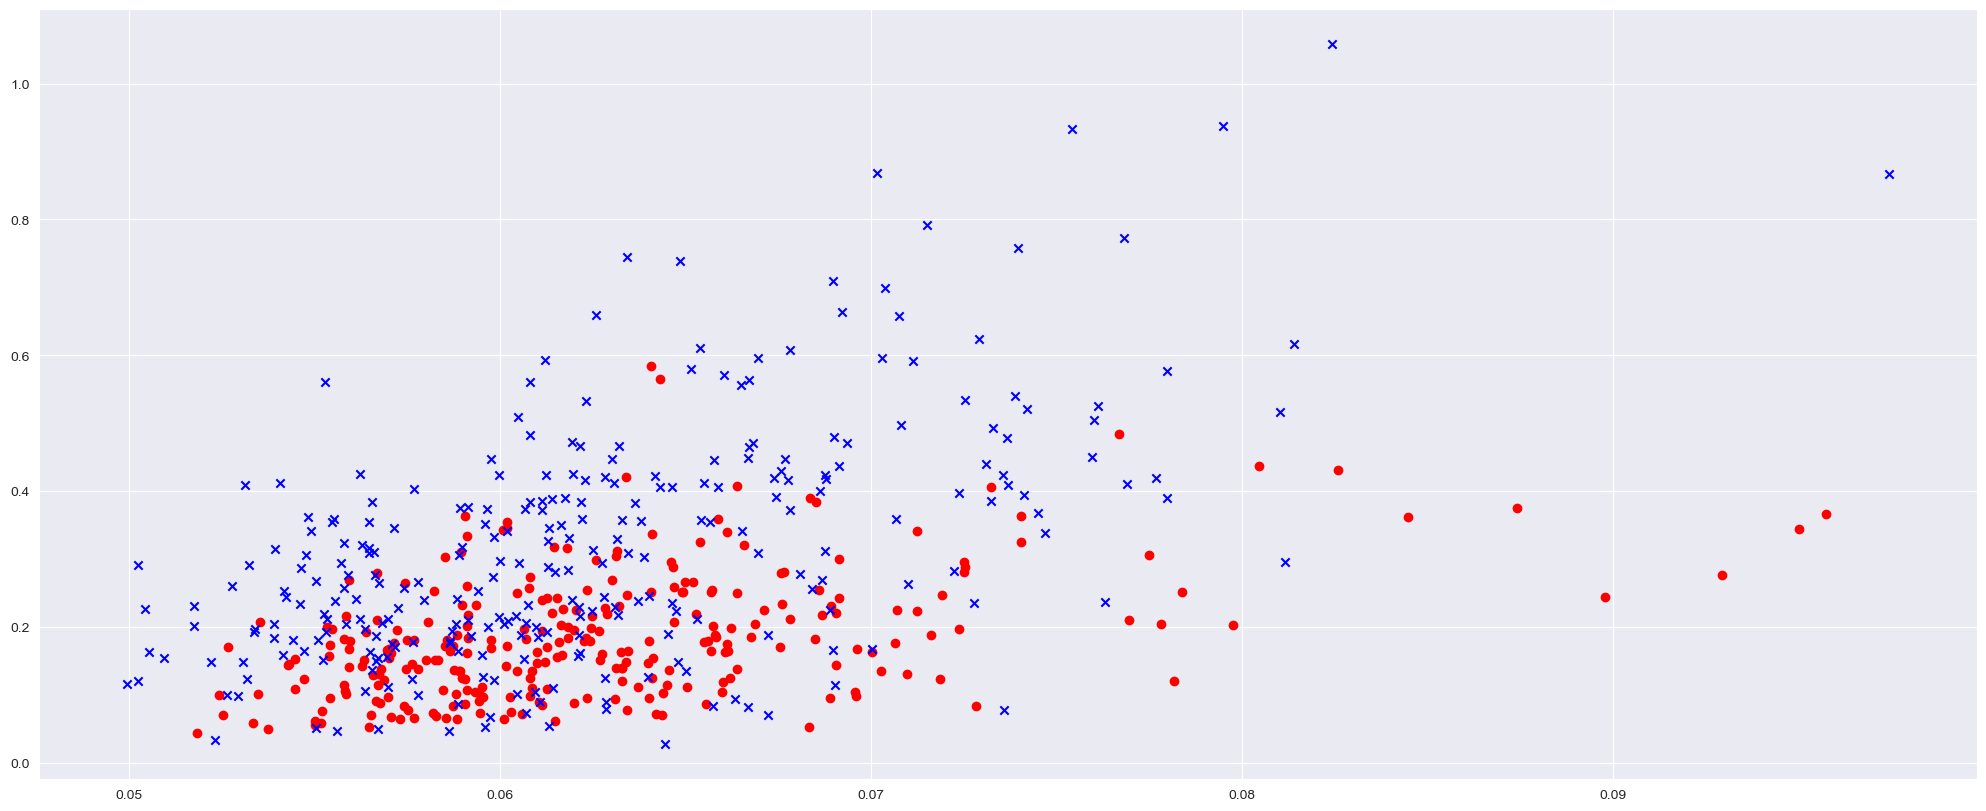

In [189]:
y = df.iloc[0:567, 0].values
X = df.iloc[0:567, [10, 26]].values
plt.figure(figsize=(25, 10))
plt.scatter(X[0:567//2, 0], X[0:567//2, 1],color='red', marker='o', label='B')
plt.scatter(X[567//2:567, 0], X[567//2:567, 1],color='blue', marker='x', label='M')
plt.show()